In [45]:
!pip install python-louvain

In [54]:
from numpy  import *
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from networkx.algorithms.community import greedy_modularity_communities
import community as community_louvain
from community import community_louvain

# **Questão 1:** Calcule a modularidade para a rede Jazz usando método fastgreedy.

Use:

G= nx.read_edgelist("data/jazz.txt", nodetype=int)

G = G.to_undirected()

G.remove_edges_from(nx.selfloop_edges(G))

Gcc = sorted(nx.connected_components(G), key=len, reverse=True)

G = G.subgraph(Gcc[0])

G = nx.convert_node_labels_to_integers(G, first_label=0)



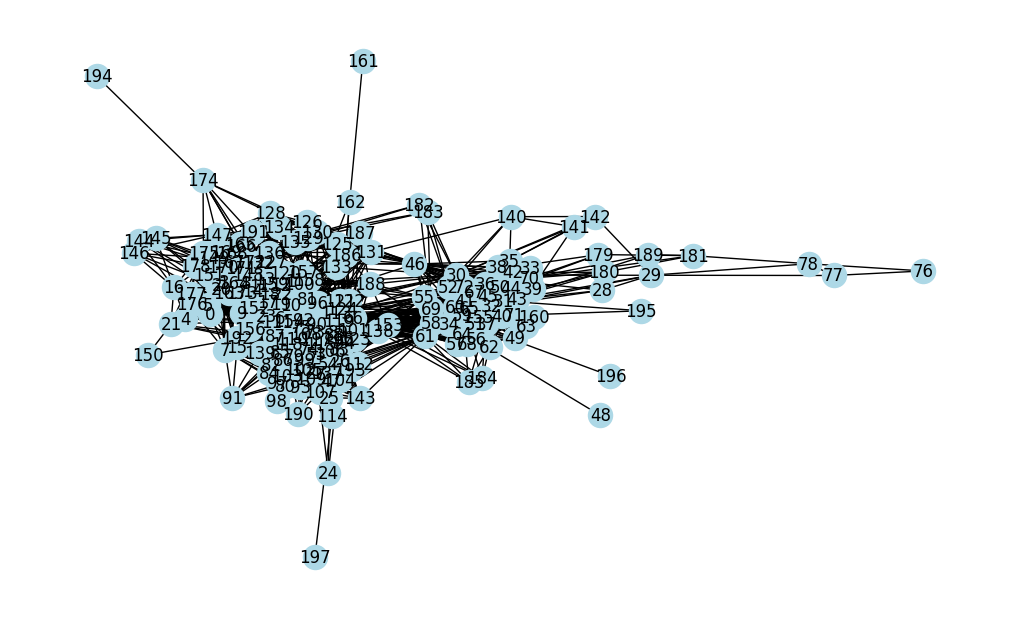

In [39]:
G= nx.read_edgelist("jazz.txt", nodetype=int)

# Transformamos o grafo em uma rede sem direção.

G = G.to_undirected()
G.remove_edges_from(nx.selfloop_edges(G))

# Selecionando apenas o maior componente conectado

Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G = G.subgraph(Gcc[0])

# Transformando os labels em números inteiros, começando com 0:

G = nx.convert_node_labels_to_integers(G, first_label=0)

#G=nx.karate_club_graph() # we can also use the networkx dataset
pos=nx.spring_layout(G)
fig= plt.figure(figsize=(10,6))
nx.draw(G, pos=pos, node_color = 'lightblue', with_labels = True)
plt.show(True)

In [40]:
communities = list(greedy_modularity_communities(G))
for k in range(0,len(communities)):
    print('Community',k,':', sorted(communities[k]))

Community 0 : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 100, 111, 120, 125, 126, 127, 128, 129, 130, 132, 134, 135, 136, 144, 145, 146, 147, 148, 149, 150, 151, 152, 157, 158, 159, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 191, 194]
Community 1 : [24, 25, 26, 27, 47, 53, 54, 73, 74, 75, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 112, 113, 114, 115, 116, 117, 118, 119, 121, 122, 123, 124, 131, 133, 137, 139, 143, 154, 156, 161, 162, 190, 192, 193, 197]
Community 2 : [28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 48, 49, 50, 51, 52, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 76, 77, 78, 138, 140, 141, 142, 153, 155, 160, 179, 180, 181, 182, 183, 184, 185, 189, 195, 196]
Community 3 : [186, 187, 188]


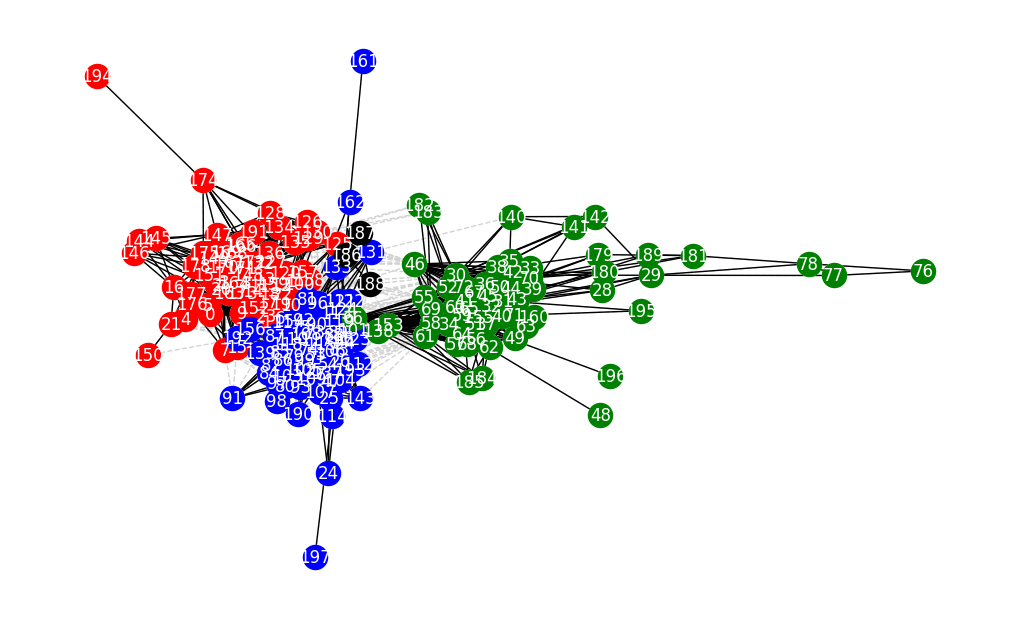

In [41]:
colors = ['red', 'blue', 'green', 'black', 'magenta', 'yellow', 'white']

fig= plt.figure(figsize=(10,6))
nx.draw(G, pos=pos, node_color = 'white', edge_color='lightgray', style='dashed')
aux = 0
for cm in communities:
    nx.draw(G.subgraph(cm), pos=pos, node_color = colors[aux],
                     with_labels = True, node_size=300, font_color = 'white')
    aux = aux + 1
plt.show(True)

In [44]:
def modularity(G, communities):
    # Create a mapping of node to community
    node_to_community = {}
    for community_index, community in enumerate(communities):
        for node in community:
            node_to_community[node] = community_index

    # Convert the adjacency matrix to a dense format (if sparse)
    A = nx.to_numpy_array(G)

    N = len(G)
    M = G.number_of_edges()
    Q = 0

    for i in np.arange(0, N):
        ki = len(list(G.neighbors(i)))
        for j in np.arange(0, N):
            if node_to_community[i] == node_to_community[j]:  # Check if nodes i and j are in the same community
                kj = len(list(G.neighbors(j)))
                Q += A[i, j] - (ki * kj) / (2 * M)

    Q = Q / (2 * M)
    return Q

# Assuming G is your graph and greedy_modularity_communities has been applied
communities = list(greedy_modularity_communities(G))
print("Modularidade Q = ", round(modularity(G, communities), 2))

Modularidade Q =  0.44


# **Quetão 2:** Calcule a modularidade para a rede Jazz usando método Louvain.

Use:

G= nx.read_edgelist("data/jazz.txt", nodetype=int)

G = G.to_undirected()

G.remove_edges_from(nx.selfloop_edges(G))

Gcc = sorted(nx.connected_components(G), key=len, reverse=True)

G = G.subgraph(Gcc[0])

G = nx.convert_node_labels_to_integers(G, first_label=0)



In [51]:
partitions =community_louvain.best_partition(G)
partitions

{0: 0,
 1: 0,
 2: 0,
 3: 0,
 4: 0,
 5: 0,
 6: 0,
 7: 1,
 8: 0,
 9: 0,
 10: 0,
 11: 0,
 12: 0,
 13: 0,
 14: 0,
 15: 1,
 16: 0,
 17: 0,
 18: 0,
 19: 0,
 20: 0,
 21: 0,
 22: 0,
 23: 0,
 24: 1,
 25: 1,
 26: 1,
 27: 1,
 28: 2,
 29: 2,
 30: 2,
 31: 2,
 32: 2,
 33: 2,
 34: 2,
 35: 2,
 36: 2,
 37: 2,
 38: 2,
 39: 2,
 40: 2,
 41: 2,
 42: 2,
 43: 2,
 44: 2,
 45: 2,
 46: 2,
 47: 1,
 48: 2,
 49: 2,
 50: 2,
 51: 2,
 52: 2,
 53: 1,
 54: 1,
 55: 2,
 56: 2,
 57: 2,
 58: 2,
 59: 2,
 60: 2,
 61: 2,
 62: 2,
 63: 2,
 64: 2,
 65: 2,
 66: 3,
 67: 2,
 68: 2,
 69: 2,
 70: 2,
 71: 2,
 72: 2,
 73: 1,
 74: 1,
 75: 1,
 76: 2,
 77: 2,
 78: 2,
 79: 1,
 80: 1,
 81: 1,
 82: 1,
 83: 1,
 84: 1,
 85: 1,
 86: 1,
 87: 1,
 88: 3,
 89: 1,
 90: 1,
 91: 1,
 92: 1,
 93: 1,
 94: 3,
 95: 3,
 96: 3,
 97: 1,
 98: 1,
 99: 1,
 100: 0,
 101: 3,
 102: 1,
 103: 1,
 104: 1,
 105: 1,
 106: 3,
 107: 1,
 108: 1,
 109: 1,
 110: 1,
 111: 1,
 112: 3,
 113: 1,
 114: 1,
 115: 3,
 116: 1,
 117: 3,
 118: 1,
 119: 1,
 120: 0,
 121: 3,
 122: 3,
 12

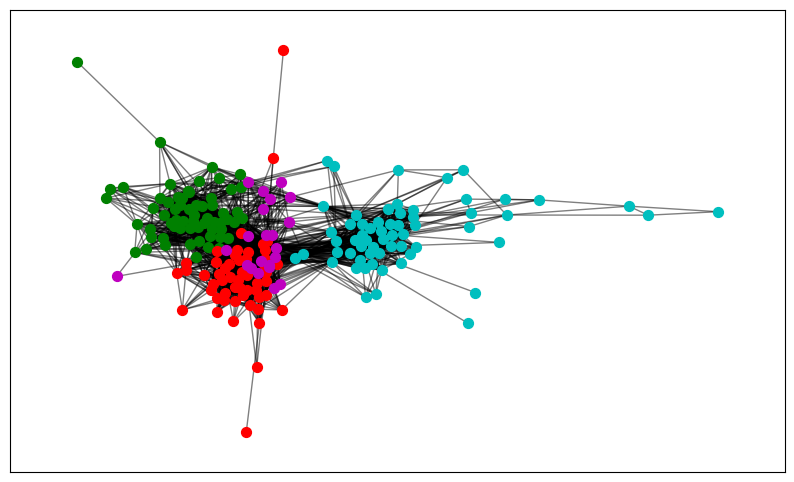

In [52]:
#drawing
fig= plt.figure(figsize=(10,6))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
size = float(len(set(partitions.values())))
count = 0
for com in set(partitions.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partitions.keys() if partitions[nodes] == com]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 50, node_color = colors[int(count)])
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

In [56]:
def modularity_louvain(G):
    # Detect communities using Louvain method
    partition = community_louvain.best_partition(G)

    # Compute modularity of the partition
    modularity = community_louvain.modularity(partition, G)

    return modularity

# Assuming G is your graph
Q = modularity_louvain(G)
print("Modularidade Q = ", round(Q,2))

Modularidade Q =  0.44


# **Questão 3:** Considere o método de geração de redes LFR_benchmark_graph. Obtenha os valores da modularidade para μ=0.05,μ=0.1,μ=0.2. Use o código a seguir para gerar as redes. Use o algoritmo de Louvain.

N = 128

tau1 = 3

tau2 = 1.5

k =16

minc = 32

maxc = 32

G = nx.LFR_benchmark_graph(n = N, tau1 = tau1, tau2 = tau2, mu = mu, min_degree = k, max_degree = k, min_community=minc, max_community = maxc, seed = 10)

Caso 1: μ = 0.05

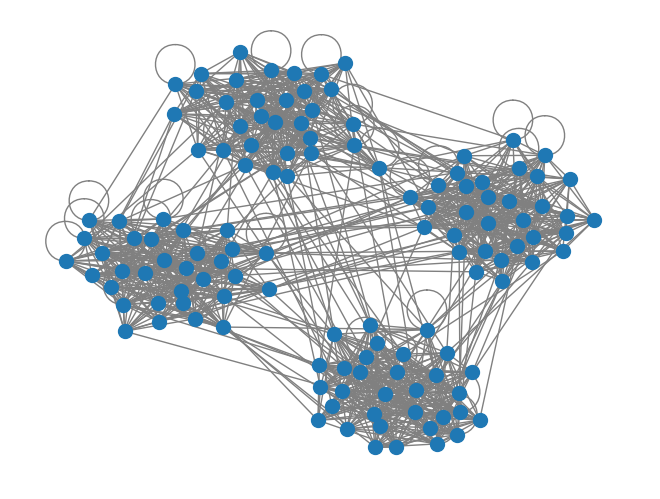

In [61]:
N = 128
tau1 = 3
mu = 0.05
tau2 = 1.5
k = 16
minc = 32
maxc = 32

G = nx.LFR_benchmark_graph(n = N, tau1 = tau1, tau2 = tau2, mu = mu, min_degree = k, max_degree = k, min_community=minc, max_community = maxc, seed = 10)

pos=nx.spring_layout(G)
nx.draw(G, with_labels = False, edge_color='gray',
        node_size=100, font_size=16,  width=1, pos = pos)
plt.show(True)

In [62]:
def modularity_louvain(G):
    # Detect communities using Louvain method
    partition = community_louvain.best_partition(G)

    # Compute modularity of the partition
    modularity = community_louvain.modularity(partition, G)

    return modularity

# Assuming G is your graph
Q = modularity_louvain(G)
print("Modularidade Q = ", round(Q,2))

Modularidade Q =  0.65


Caso 2: μ = 0.1

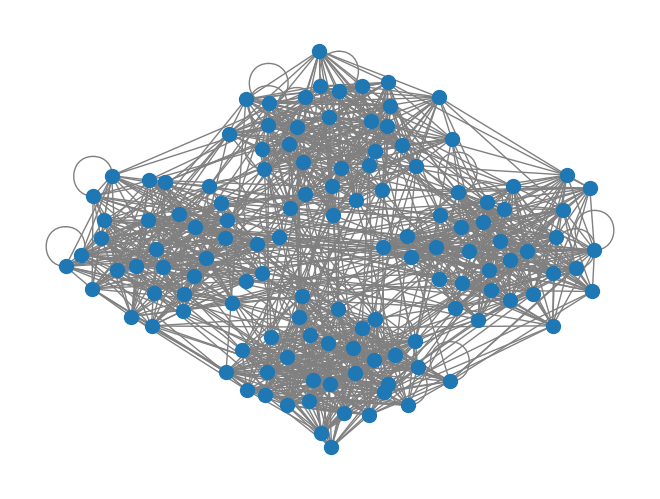

In [63]:
N = 128
tau1 = 3
mu = 0.1
tau2 = 1.5
k = 16
minc = 32
maxc = 32

G = nx.LFR_benchmark_graph(n = N, tau1 = tau1, tau2 = tau2, mu = mu, min_degree = k, max_degree = k, min_community=minc, max_community = maxc, seed = 10)

pos=nx.spring_layout(G)
nx.draw(G, with_labels = False, edge_color='gray',
        node_size=100, font_size=16,  width=1, pos = pos)
plt.show(True)

In [64]:
def modularity_louvain(G):
    # Detect communities using Louvain method
    partition = community_louvain.best_partition(G)

    # Compute modularity of the partition
    modularity = community_louvain.modularity(partition, G)

    return modularity

# Assuming G is your graph
Q = modularity_louvain(G)
print("Modularidade Q = ", round(Q,2))

Modularidade Q =  0.55


Caso 3:  μ = 0.2

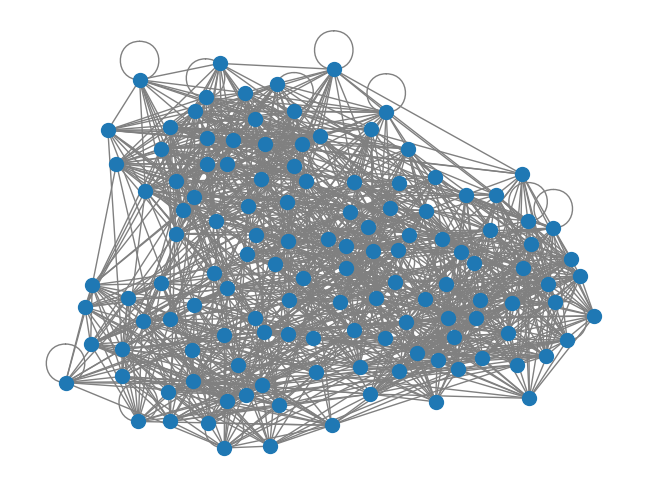

In [65]:
N = 128
tau1 = 3
mu = 0.2
tau2 = 1.5
k = 16
minc = 32
maxc = 32

G = nx.LFR_benchmark_graph(n = N, tau1 = tau1, tau2 = tau2, mu = mu, min_degree = k, max_degree = k, min_community=minc, max_community = maxc, seed = 10)

pos=nx.spring_layout(G)
nx.draw(G, with_labels = False, edge_color='gray',
        node_size=100, font_size=16,  width=1, pos = pos)
plt.show(True)

In [66]:
def modularity_louvain(G):
    # Detect communities using Louvain method
    partition = community_louvain.best_partition(G)

    # Compute modularity of the partition
    modularity = community_louvain.modularity(partition, G)

    return modularity

# Assuming G is your graph
Q = modularity_louvain(G)
print("Modularidade Q = ", round(Q,2))

Modularidade Q =  0.45


# **Questão 4:** Considere o método de geração de redes LFR_benchmark_graph. Obtenha os valores da modularidade para μ=0.05,μ=0.2,μ=0.4. Use o código a seguir para gerar as redes. Use o algoritmo fastgreedy.

N = 128

tau1 = 3

tau2 = 1.5

k =16

minc = 32

maxc = 32

G = nx.LFR_benchmark_graph(n = N, tau1 = tau1, tau2 = tau2, mu = mu, min_degree = k, max_degree = k, min_community=minc, max_community = maxc, seed = 10)

Caso 1: μ = 0.05

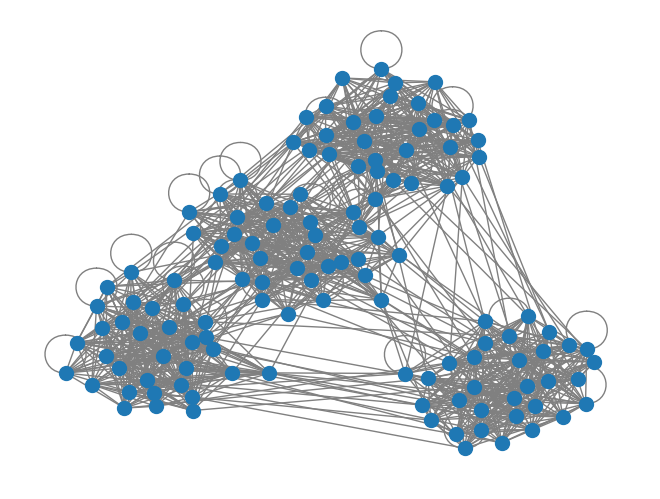

In [68]:
N = 128
tau1 = 3
mu = 0.05
tau2 = 1.5
k = 16
minc = 32
maxc = 32

G = nx.LFR_benchmark_graph(n = N, tau1 = tau1, tau2 = tau2, mu = mu, min_degree = k, max_degree = k, min_community=minc, max_community = maxc, seed = 10)

pos=nx.spring_layout(G)
nx.draw(G, with_labels = False, edge_color='gray',
        node_size=100, font_size=16,  width=1, pos = pos)
plt.show(True)

In [69]:
def modularity(G, communities):
    # Create a mapping of node to community
    node_to_community = {}
    for community_index, community in enumerate(communities):
        for node in community:
            node_to_community[node] = community_index

    # Convert the adjacency matrix to a dense format (if sparse)
    A = nx.to_numpy_array(G)

    N = len(G)
    M = G.number_of_edges()
    Q = 0

    for i in np.arange(0, N):
        ki = len(list(G.neighbors(i)))
        for j in np.arange(0, N):
            if node_to_community[i] == node_to_community[j]:  # Check if nodes i and j are in the same community
                kj = len(list(G.neighbors(j)))
                Q += A[i, j] - (ki * kj) / (2 * M)

    Q = Q / (2 * M)
    return Q

# Assuming G is your graph and greedy_modularity_communities has been applied
communities = list(greedy_modularity_communities(G))
print("Modularidade Q = ", round(modularity(G, communities), 2))

Modularidade Q =  0.64


Caso 2: μ = 0.2

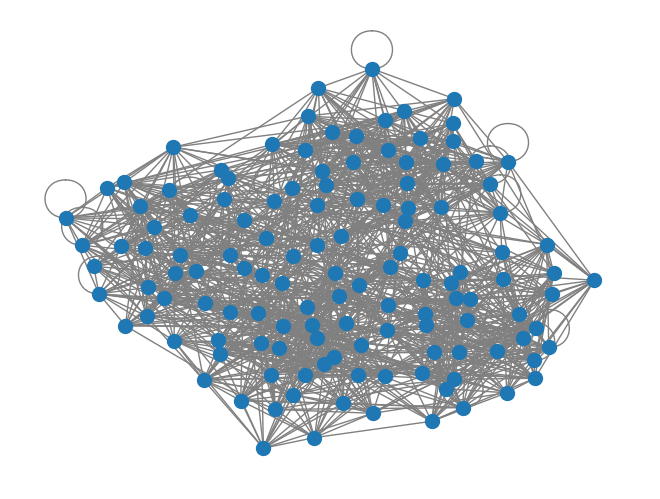

In [70]:
N = 128
tau1 = 3
mu = 0.2
tau2 = 1.5
k = 16
minc = 32
maxc = 32

G = nx.LFR_benchmark_graph(n = N, tau1 = tau1, tau2 = tau2, mu = mu, min_degree = k, max_degree = k, min_community=minc, max_community = maxc, seed = 10)

pos=nx.spring_layout(G)
nx.draw(G, with_labels = False, edge_color='gray',
        node_size=100, font_size=16,  width=1, pos = pos)
plt.show(True)

In [71]:
def modularity(G, communities):
    # Create a mapping of node to community
    node_to_community = {}
    for community_index, community in enumerate(communities):
        for node in community:
            node_to_community[node] = community_index

    # Convert the adjacency matrix to a dense format (if sparse)
    A = nx.to_numpy_array(G)

    N = len(G)
    M = G.number_of_edges()
    Q = 0

    for i in np.arange(0, N):
        ki = len(list(G.neighbors(i)))
        for j in np.arange(0, N):
            if node_to_community[i] == node_to_community[j]:  # Check if nodes i and j are in the same community
                kj = len(list(G.neighbors(j)))
                Q += A[i, j] - (ki * kj) / (2 * M)

    Q = Q / (2 * M)
    return Q

# Assuming G is your graph and greedy_modularity_communities has been applied
communities = list(greedy_modularity_communities(G))
print("Modularidade Q = ", round(modularity(G, communities), 2))

Modularidade Q =  0.43


Caso 3: μ = 0.4

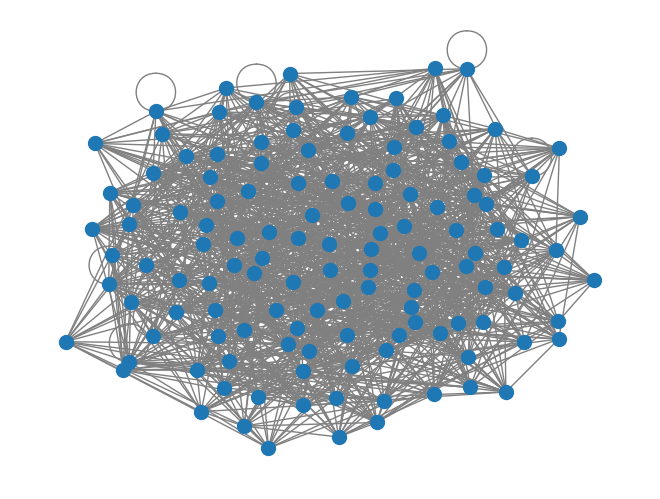

In [72]:
N = 128
tau1 = 3
mu = 0.4
tau2 = 1.5
k = 16
minc = 32
maxc = 32

G = nx.LFR_benchmark_graph(n = N, tau1 = tau1, tau2 = tau2, mu = mu, min_degree = k, max_degree = k, min_community=minc, max_community = maxc, seed = 10)

pos=nx.spring_layout(G)
nx.draw(G, with_labels = False, edge_color='gray',
        node_size=100, font_size=16,  width=1, pos = pos)
plt.show(True)

In [73]:
def modularity(G, communities):
    # Create a mapping of node to community
    node_to_community = {}
    for community_index, community in enumerate(communities):
        for node in community:
            node_to_community[node] = community_index

    # Convert the adjacency matrix to a dense format (if sparse)
    A = nx.to_numpy_array(G)

    N = len(G)
    M = G.number_of_edges()
    Q = 0

    for i in np.arange(0, N):
        ki = len(list(G.neighbors(i)))
        for j in np.arange(0, N):
            if node_to_community[i] == node_to_community[j]:  # Check if nodes i and j are in the same community
                kj = len(list(G.neighbors(j)))
                Q += A[i, j] - (ki * kj) / (2 * M)

    Q = Q / (2 * M)
    return Q

# Assuming G is your graph and greedy_modularity_communities has been applied
communities = list(greedy_modularity_communities(G))
print("Modularidade Q = ", round(modularity(G, communities), 2))

Modularidade Q =  0.16
